# Assignment 3a 
--*made by WANG Shuwei*


## The Dataset:
### Netflix IMDB Scores

The dataset that we're working with in this Jupyter Notebook is made by Back 2 Viz Basics (https://data.world/back2vizbasics).The Netflix TV Shows and Movies dataset provides comprehensive information about various titles available on the popular streaming platform. The dataset includes details such as the title's name, its type (whether it is a TV show or a movie), a brief description of the content, the year it was released, age certification rating, runtime (for TV shows: length of episodes; for movies: duration), IMDb score, and IMDb votes.

In this notebook, I am trying to find out that:
1. Trends in the number of people who voted for Netflix on IMDB over the years.
2. Find most popular movies and TV shows.
3. Based on the ratings, what length of content users are more likely to watch.
4. Analyze the changes in the number of movies and TV shows released to understand Netflix's growth trends over different years.

## Import Pandas

In [3]:
import pandas as pd

## Change Display Settings

In [4]:
pd.options.display.max_rows = 300

## Get Data

The file path can be changed based on the path where the individual downloaded the file

In [5]:
netflix_df = pd.read_csv('D:\collecting data/Netflix TV Shows and Movies.csv', delimiter=",", encoding='utf-8')

## Overview

In [6]:
netflix_df.sample(10)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
1910,1910,tm434008,Banana Split,MOVIE,"Over the course of a summer, two teenage girls...",2018,R,88,tt7755856,6.2,3190.0
5267,5267,tm851599,Tersanjung: The Movie,MOVIE,"After growing up in a tumultuous household, Yu...",2021,NaN,114,tt11668994,5.8,205.0
1533,1533,ts42260,Chelsea Does,SHOW,Comedienne and writer Chelsea Handler discusse...,2016,TV-MA,60,tt5275894,7.3,2471.0
3475,3475,ts103360,The Barrier,SHOW,"In 2045, Spain like the rest of the western wo...",2020,TV-MA,52,tt9460858,6.8,3447.0
5238,5238,tm987730,Tribhanga,MOVIE,"When her estranged mother falls into a coma, a...",2021,NaN,95,tt11102314,6.2,2888.0
600,600,tm254052,Kucch To Hai,MOVIE,Indian film-makers have now come up with their...,2003,NaN,142,tt0348662,4.3,909.0
300,300,ts30313,Offspring,SHOW,"An exuberant drama set in Melbourne's Fitzroy,...",2010,NaN,44,tt1530541,8.3,4764.0
3404,3404,ts270465,SanPa: Sins of the Savior,SHOW,"Amidst a heroin crisis, Vincenzo Muccioli care...",2020,NaN,57,tt13731400,7.8,1488.0
5223,5223,tm831387,What Happened to Mr Cha?,MOVIE,"With the peak of his career long behind him, a...",2021,NaN,102,tt13667212,4.3,349.0
957,957,ts22445,The Heirs,SHOW,"Heirs follows a group of privileged, elite hig...",2013,NaN,59,tt3243098,7.5,10329.0


Generate information about all the columns in the data

In [7]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


## 1. Trends in the number of people who voted for Netflix on IMDB over the years.

In [8]:
count_vote_df = netflix_df[['imdb_votes', 'release_year']]

In [9]:
grouped_count_df = count_vote_df.groupby('release_year')['imdb_votes'].sum().reset_index()

In [10]:
grouped_count_df

,release_year,imdb_votes
0,1953,231.0
1,1954,43592.0
2,1956,590.0
3,1958,4385.0
4,1959,78.0
5,1960,82.0
6,1961,50150.0
7,1962,285.0
8,1963,2470.0
9,1964,94121.0


### Generate a visualization chart

<Axes: xlabel='release_year'>

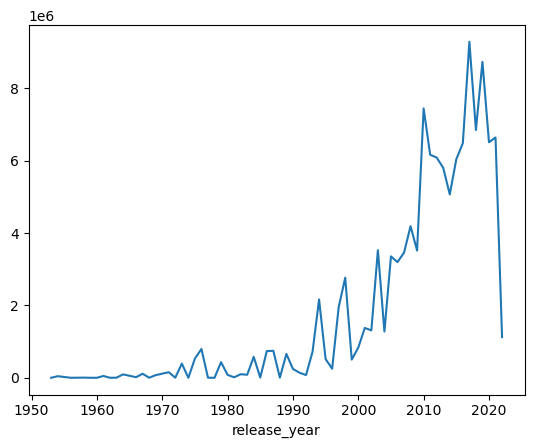

In [27]:
grouped_count_df['imdb_votes'].plot(kind='line')

## 2. Find most popular movies and TV shows.

In [30]:
netflix_df.sort_values(by='imdb_votes', ascending=False).head(10)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
246,246,tm92641,Inception,MOVIE,"Cobb, a skilled thief who commits corporate es...",2010,PG-13,148,tt1375666,8.8,2268288.0
101,101,tm122434,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,tt0109830,8.8,1994599.0
229,229,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,tt0903747,9.5,1727694.0
662,662,tm41792,Django Unchained,MOVIE,"With the help of a German bounty hunter, a fre...",2012,R,165,tt1853728,8.4,1472668.0
104,104,tm57554,Saving Private Ryan,MOVIE,"As U.S. troops storm the beaches of Normandy, ...",1998,R,169,tt0120815,8.6,1346020.0
1145,1145,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,52,tt4575572,8.7,989090.0
230,230,ts9,The Walking Dead,SHOW,Sheriff's deputy Rick Grimes awakens from a co...,2010,TV-MA,46,tt1520211,8.2,945125.0
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
870,870,tm140877,The Imitation Game,MOVIE,Based on the real life story of legendary cryp...,2014,PG-13,113,tt2084970,8.0,748654.0
48,48,tm22327,Full Metal Jacket,MOVIE,A pragmatic U.S. Marine observes the dehumaniz...,1987,R,116,tt0093058,8.3,723306.0


The most popular movies and TV shows can already be found through the top ten most voted lists: Inception and Breaking Bad.

## 3. Based on the ratings, what length of content users are more likely to watch.

<Axes: xlabel='runtime', ylabel='imdb_score'>

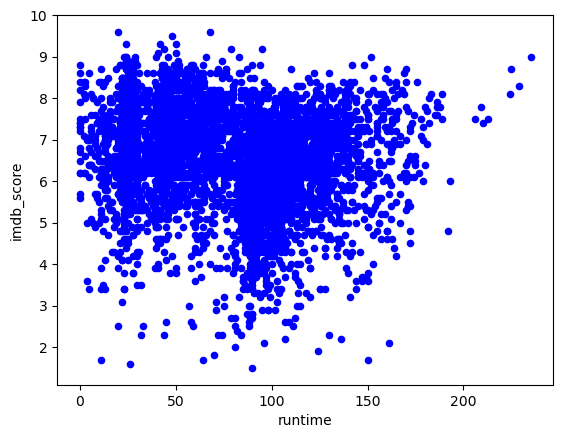

In [32]:
netflix_df.plot(kind='scatter', x='runtime', y='imdb_score', color='blue')

Through the chart,we can made a conclusion that the runtime less than 150 min is better.However, the movies longer than 150 minutes are obviously rated higher than 7.

## 4. Analyze the changes in the number of movies and TV shows released to understand Netflix's growth trends over different years.

In [36]:
count_df = pd.crosstab(index=netflix_df['release_year'], columns=netflix_df['type'])
count_df.columns = ['MOVIE', 'SHOW']

In [37]:
count_df

,MOVIE,SHOW
release_year,,
1953,1,0
1954,2,0
1956,1,0
1958,1,0
1959,1,0
1960,1,0
1961,1,0
1962,1,0
1963,1,0


From the table, it can be intuitively felt that netflix has always produced more movies and put its focus on film production